##### Bivariate exploration means generation of visuals based on a two variable.
##### The plots are determined using the data type of the data to be plotted.

Two Quantitative data
<ul>
    <li><a href="#scat">Scatter plot </a></li>
    <li><a href="#heat">Heat map </a></li>
</ul>
    
Qualitative vs Quantitative data
<ul>
    <li><a href="#vio">Violin plot</a></li>
    <li><a href="#box">Box Plot</a></li>
    <li><a href="#face">Faceted Plot</a></li>
</ul>


Two Qualitative data
<ul>
<li><a href="#clus">Clustered Bar chart </a></li>
</ul>


In [1]:
# imoport libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading fuel data
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_econ['trans'] = fuel_econ['trans'].apply(lambda x : x.split()[0])

<a id='scat'></a>
### Scatter plot
To plot relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

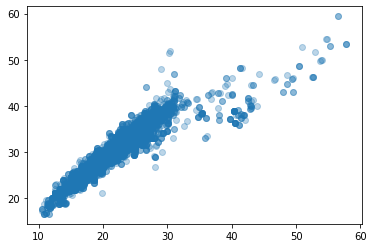

In [4]:
# matplotlib uses scatter function
# alpha adds transparency
plt.scatter(data = fuel_econ, x = 'city', y = 'highway',alpha = 0.3);

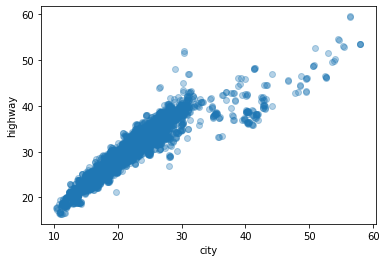

In [5]:
# seaborn uses 'regplot' function.
#The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values.
# "scatter_kws" for transparency.
sb.regplot(data = fuel_econ, x = 'city', y = 'highway',fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

<a id='heat'></a>
### Heat Map
A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. 

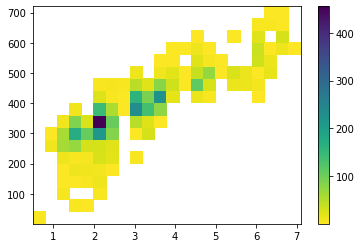

In [6]:
# "cmpa" for colour, "cmin" parameter specifies the minimum value in a cell before it will be plotted
# "hist2d" function in matplotlib can plot a heatmap
bin_y = np.arange(0.5,fuel_econ['co2'].max() + 40, 40)
bin_x = np.arange(0.5,fuel_econ['displ'].max() + 0.3, 0.3)
plt.hist2d(data = fuel_econ, y = 'co2', x = 'displ', cmap = 'viridis_r', cmin = 0.5, bins = [bin_x,bin_y]);
plt.colorbar();

<a id='vio'></a>
### Violin Plot
For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. violinplot function in seaborn can be used

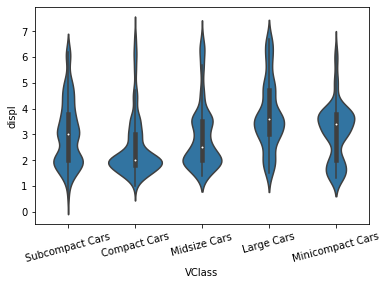

In [7]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15);

<a id='box'></a>
### Box plot
Reports a set of descriptive statistics for the numeric values on each categorical level. 

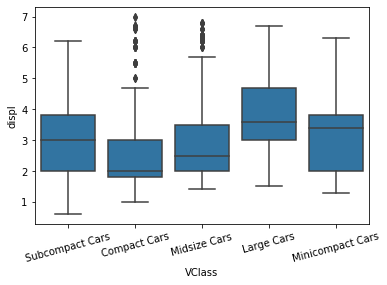

In [8]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', color = base_color)
plt.xticks(rotation = 15);

<a id='face'></a>
### Faceted Plot
Multiple copies of same type of plot visualized on different subset of the data

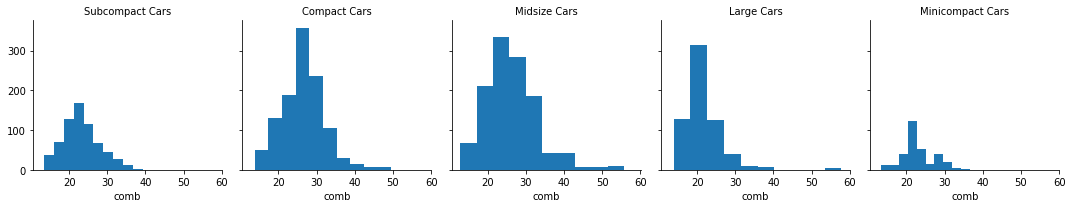

In [9]:

g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb");
g.set_titles('{col_name}')

<a id='clus'></a>
### Clustered Bar chart
In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:



(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

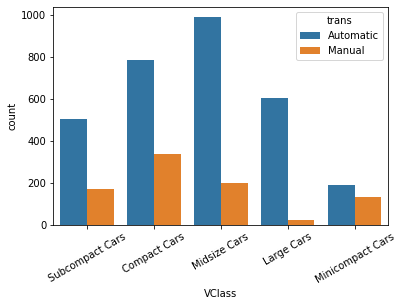

In [10]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans');
plt.xticks(rotation = 30)
